In [1]:
## set-up directories

import os

os.listdir()
#os.chdir("")
os.listdir()

# This is the directory where those files are downloaded to
data_dir = "data/pbmc10k"
rna_data_dir = "data/rna_data"

## Load Libraries

In [2]:
import numpy as np
import pandas as pd
import scanpy as sc
import anndata as ad
import muon as mu

In [3]:
mdata = mu.read_10x_h5(os.path.join(data_dir, "filtered_feature_bc_matrix.h5"))
mdata.var_names_make_unique()
mdata

/opt/conda/lib/python3.10/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


Added `interval` annotation for features from data/pbmc10k/filtered_feature_bc_matrix.h5


/opt/conda/lib/python3.10/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/opt/conda/lib/python3.10/site-packages/mudata/_core/mudata.py:437: UserWarning: var_names are not unique. To make them unique, call `.var_names_make_unique`.
  warnings.warn(


Added peak annotation from data/pbmc10k/atac_peak_annotation.tsv to .uns['atac']['peak_annotation']
Added gene names to peak annotation in .uns['atac']['peak_annotation']
Located fragments file: data/pbmc10k/atac_fragments.tsv.gz


[W::hts_idx_load3] The index file is older than the data file: data/pbmc10k/atac_fragments.tsv.gz.tbi


MuData object with n_obs × n_vars = 11909 × 144978
  var:	'gene_ids', 'feature_types', 'genome', 'interval'
  2 modalities
    rna:	11909 x 36601
      var:	'gene_ids', 'feature_types', 'genome', 'interval'
    atac:	11909 x 108377
      var:	'gene_ids', 'feature_types', 'genome', 'interval'
      uns:	'atac', 'files'

In [4]:
rna = mdata.mod['rna']
rna

AnnData object with n_obs × n_vars = 11909 × 36601
    var: 'gene_ids', 'feature_types', 'genome', 'interval'

In [5]:
rna.var['mt'] = rna.var_names.str.startswith('MT-')  # annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(rna, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

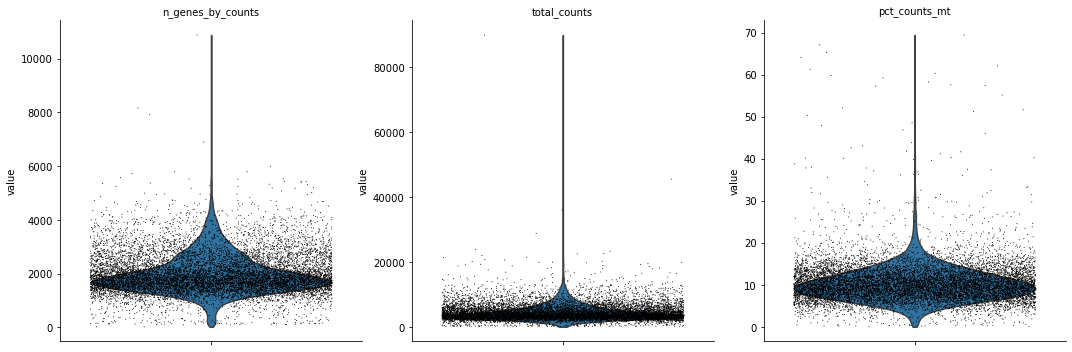

In [6]:
sc.pl.violin(rna, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],
             jitter=0.4, multi_panel=True)

In [7]:
mu.pp.filter_var(rna, 'n_cells_by_counts', lambda x: x >= 3)
# This is analogous to
#   sc.pp.filter_genes(rna, min_cells=3)
# but does in-place filtering and avoids copying the object

In [8]:
mu.pp.filter_obs(rna, 'n_genes_by_counts', lambda x: (x >= 200) & (x < 5000))
# This is analogous to 
#   sc.pp.filter_cells(rna, min_genes=200)
#   rna = rna[rna.obs.n_genes_by_counts < 5000, :]
# but does in-place filtering avoiding copying the object

mu.pp.filter_obs(rna, 'total_counts', lambda x: x < 15000)
mu.pp.filter_obs(rna, 'pct_counts_mt', lambda x: x < 20)

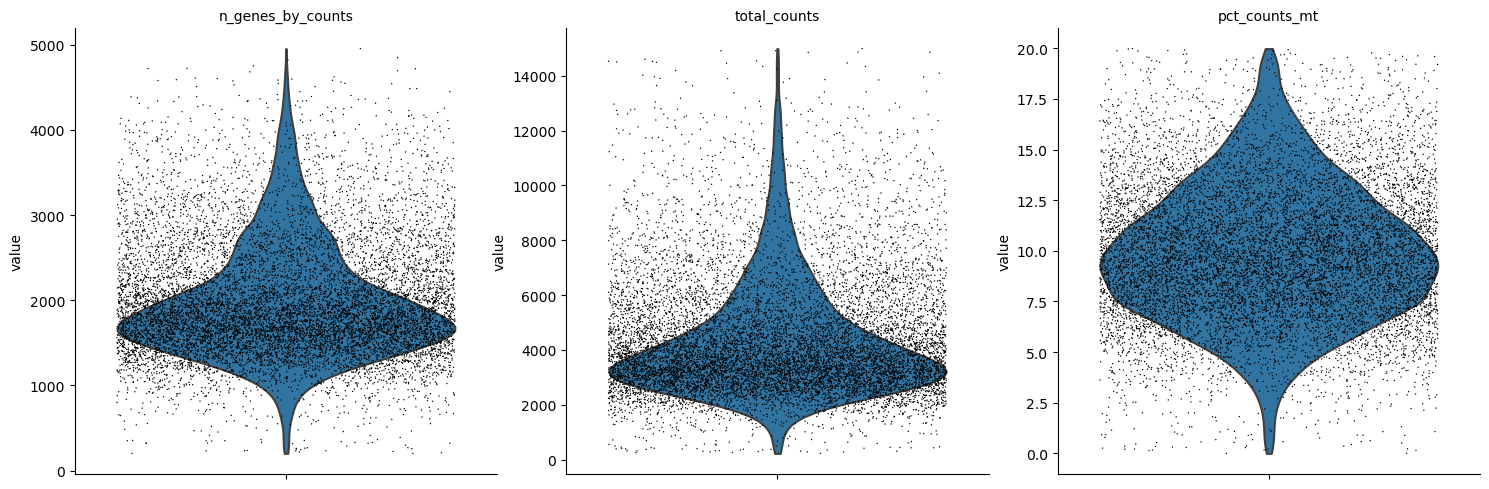

In [9]:
sc.pl.violin(rna, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],
             jitter=0.4, multi_panel=True)

In [10]:
sc.pp.normalize_total(rna, target_sum=1e4)

In [11]:
sc.pp.log1p(rna)
rna

AnnData object with n_obs × n_vars = 11565 × 26349
    obs: 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'gene_ids', 'feature_types', 'genome', 'interval', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'log1p'

In [12]:
rna.X

<11565x26349 sparse matrix of type '<class 'numpy.float32'>'
	with 22961006 stored elements in Compressed Sparse Row format>

<h1>Export</h1>


In [13]:
sc.pp.highly_variable_genes(rna, min_mean=0.02, max_mean=4, min_disp=0.5, subset=False)

In [14]:
rna.X

<11565x26349 sparse matrix of type '<class 'numpy.float32'>'
	with 22961006 stored elements in Compressed Sparse Row format>

In [15]:
pd.DataFrame(rna.var.index).to_csv(os.path.join(rna_data_dir, "genes_rna.tsv" ), sep = "\t", index=False)

In [16]:
pd.DataFrame(rna.obs.index).to_csv(os.path.join(rna_data_dir, "barcodes_rna.tsv"), sep = "\t", index = False)

In [17]:
rna.T.to_df().to_csv(os.path.join(rna_data_dir, "matrix_rna.tsv"), sep = "\t")

In [18]:
rna.T.to_df()


,AAACAGCCAAGGAATC-1,AAACAGCCAATCCCTT-1,AAACAGCCAATGCGCT-1,AAACAGCCACACTAAT-1,AAACAGCCACCAACCG-1,AAACAGCCAGGATAAC-1,AAACAGCCAGTAGGTG-1,AAACAGCCAGTTTACG-1,AAACAGCCATCCAGGT-1,AAACATGCAAGGTCCT-1,...,TTTGTGTTCTCCATAT-1,TTTGTTGGTCAGGAAG-1,TTTGTTGGTCCACAAA-1,TTTGTTGGTCTTTATG-1,TTTGTTGGTGACATGC-1,TTTGTTGGTGTTAAAC-1,TTTGTTGGTTAGGATT-1,TTTGTTGGTTGCAGTA-1,TTTGTTGGTTGGTTAG-1,TTTGTTGGTTTGCAGA-1
AL627309.1,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.00000,0.0
AL627309.5,0.0,0.0,0.000000,0.000000,0.0,0.0,0.838705,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.00000,0.0
AL627309.4,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.00000,0.0
AL669831.2,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.00000,0.0
LINC01409,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.926552,0.0,0.000000,0.0,0.000000,0.00000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AL592183.1,0.0,0.0,0.897942,1.912551,0.0,0.0,0.838705,0.0,0.0,0.0,...,1.492249,0.0,0.0,0.926552,0.0,2.077039,0.0,1.121248,1.47304,0.0
AC240274.1,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.00000,0.0
AC004556.3,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.00000,0.0
AC007325.1,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.00000,0.0
